In [179]:
import pandas as pd 
import numpy as np
import os
import glob
from tools import plot_sample_images
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import shutil
tf.get_logger().setLevel('INFO') # Avoid info messages from TF 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

ImportError: cannot import name 'dir_nohidden' from 'tools' (/Users/alejandroflores/VS_CODE/CNN-Malaria-Detection/src/tools.py)

In [104]:
# Load Images and Corresponding labels from the dataset
DIRECTORY = "../data/cell_images"
classes = sorted(os.listdir(DIRECTORY)[1:])# Labels
classes

['Parasitized', 'Uninfected']

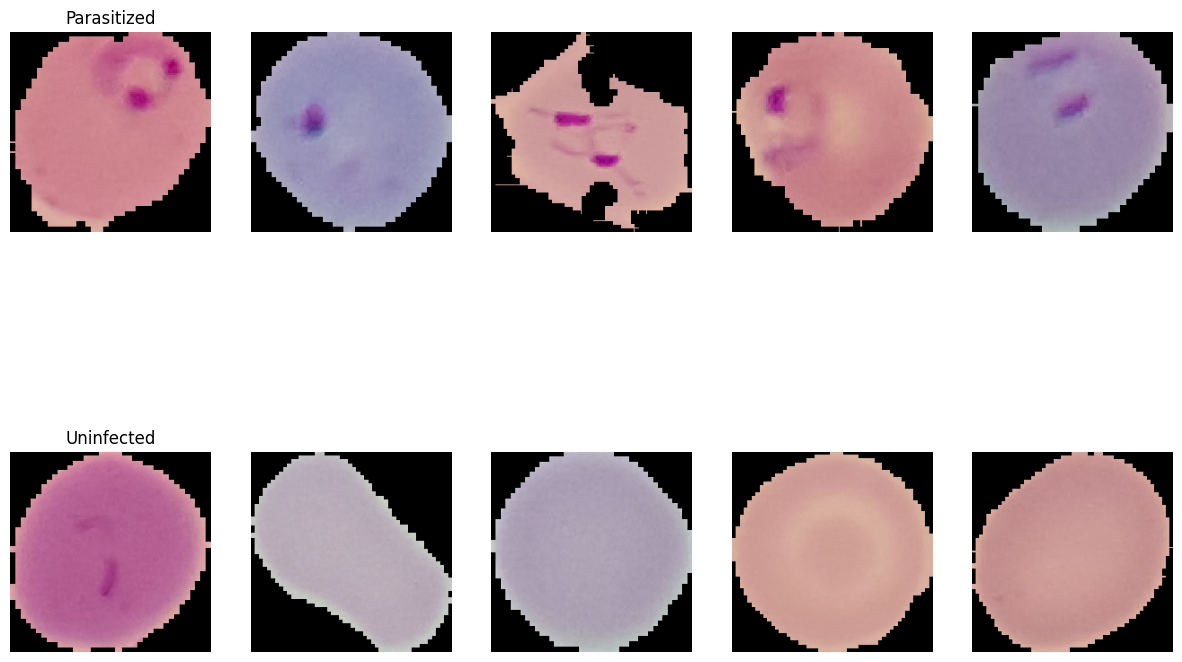

In [105]:
def plot_sample_images(directory, num_samples=5):
    classes = sorted(os.listdir(DIRECTORY)[1:])
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(15, 10))

    for i, cls in enumerate(classes):
        class_dir = os.path.join(directory, cls)
        class_images = os.listdir(class_dir)[:num_samples]
        for j, image_name in enumerate(class_images):
            image_path = os.path.join(class_dir, image_name)
            img = load_img(image_path, target_size=(224, 224))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(cls)
    plt.show()

# Set your dataset path
# Plot sample images from the training directory
plot_sample_images(os.path.join(DIRECTORY))

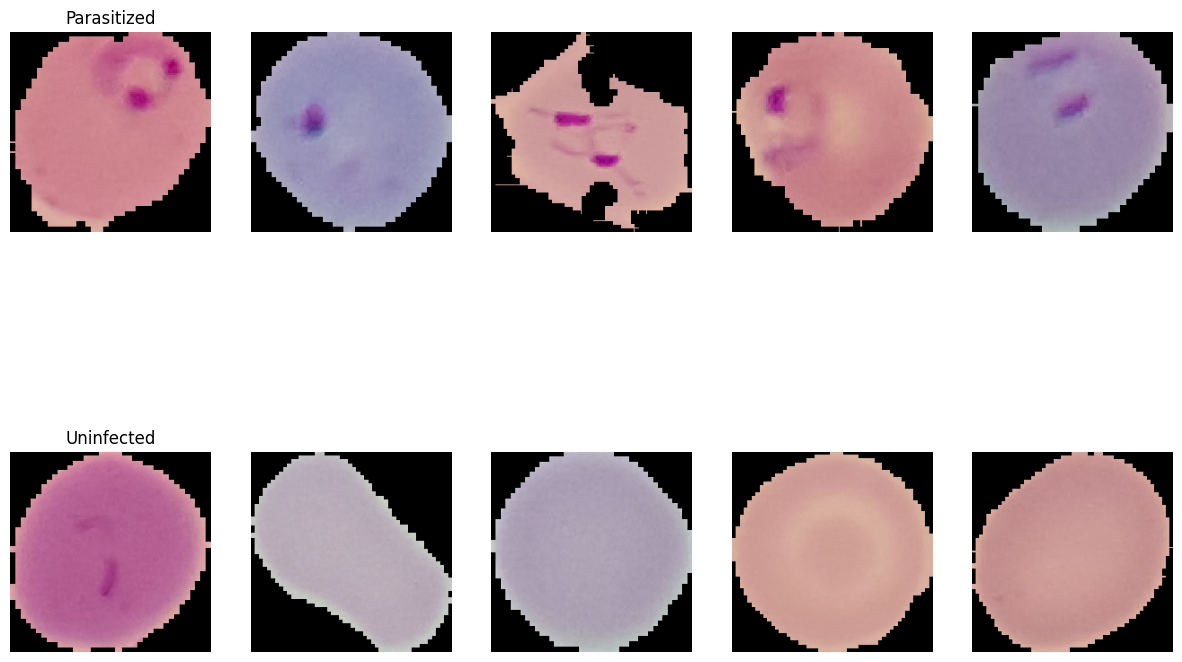

Found 27558 files belonging to 2 classes.
Found 27558 images belonging to 2 classes.


In [106]:

# Visualazing Images and Corresponding labels from the dataset
DIRECTORY = "../data/cell_images"

# Plot sample images 
plot_sample_images(DIRECTORY)

# Image data loading
# Generates dataset from images files in a directory

dataset= image_dataset_from_directory(
    DIRECTORY,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)
# Found 27558 files belonging to 2 classes.
'''
yields batches of images from the subdirectories Parasitized and Uninfected, 
together with labels 0 and 1 (0 corresponding to Parasitized and 1 corresponding to Uninfected).
'''

# Split dataset into training, validation and test set


# Data Augmentation using Keras library. 


training_data_generator = ImageDataGenerator(
    rescale=1.0/255, 
    zoom_range=0.2, 
    rotation_range=15, 
    width_shift_range=0.05, 
    height_shift_range=0.05)


'''
Modify training_data_generator so that it will also automatically perform pixel normalization. 
Rescale keyword argument equal to 1.0/255.

Set zoom_range to be 0.2. This will randomly increase or decrease the size of the image by up to 20%.

Set rotation_range to be 15. This randomly rotates the image between [-15,15] degrees.

Set width_shift_range equal to 0.05. This shift the image along its width by up to +/- 5%

Set height_shift_range to be 0.05. This shifts the image along its height by up to +/- 5%
'''

# print(training_data_generator.__dict__)

'''
data/cell_images is the folder containing cell images organized in 2 folders
Parasitized: RBC infected with Plasmodium
Uninfected: RBC not infected
flow_from_directory will automatically label the images according to their subfolder
'''

CLASS_MODE="categorical"
'''
Categorical loss function will be used, which will exepct labels to be in a a OHE format. 
[0,1] for Infected and [1,0] for not infected'''

COLOR_MODE="rgb"

TARGET_SIZE = (256,256)

BATCH_SIZE = 32


# Creates a DirectoryIterator object using the above parameters: 

training_iterator = training_data_generator.flow_from_directory(
    DIRECTORY,
    class_mode=CLASS_MODE,
    color_mode=COLOR_MODE, 
    target_size=TARGET_SIZE, 
    batch_size=BATCH_SIZE
)

In [107]:
COLOR_MODE="rgb"

TARGET_SIZE = (256,256)

BATCH_SIZE = 32


# Creates a DirectoryIterator object using the above parameters: 

training_iterator = training_data_generator.flow_from_directory(
    DIRECTORY,
    class_mode=CLASS_MODE,
    color_mode=COLOR_MODE, 
    target_size=TARGET_SIZE, 
    batch_size=BATCH_SIZE
)

sample_batch_input, sample_batch_labels = training_iterator.next()

print(sample_batch_input.shape,sample_batch_labels.shape)

Found 27558 images belonging to 2 classes.
(32, 256, 256, 3) (32, 2)


In [108]:
sample_batch_input, sample_batch_labels = training_iterator.next()
# next() is used to fetch the next batch of data from the iterator. Returns a tuple containing the input batch (images) and corresponding label batch. 
print(sample_batch_input.shape,sample_batch_labels.shape)

class_mapping = training_iterator.class_indices
print(class_mapping)

(32, 256, 256, 3) (32, 2)
{'Parasitized': 0, 'Uninfected': 1}


In [109]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to the original data and the new train/test/validation directories
original_data_dir = '../data/cell_images'
train_dir = '../data/cell_images/train'
test_dir = '../data/cell_images/test'
validation_dir = '../data/cell_images/validation'
"""
# Create the new train/test/validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
"""
# Get a list of class subdirectories in the original data directory
class_subdirectories = [d for d in os.listdir(original_data_dir) if os.path.isdir(os.path.join(original_data_dir, d))]

for class_subdir in class_subdirectories: # for 'Class' in ['Class1', 'Class2']
    class_path = os.path.join(original_data_dir, class_subdir) # ../data/cell_images/Parasitized and ../data/cell_images/Uninfected
    class_images = [img for img in os.listdir(class_path)] # ['C13NThinF_IMG_20150614_131318_cell_179.png'... all images for each class

    train_images, test_validation_images = train_test_split(class_images, test_size=0.3, random_state=42)
    test_images, validation_images = train_test_split(test_validation_images, test_size=0.5, random_state=42)

    print(len(class_images)) # 13780 (all images for class_subdir) or 100%
    print(len(train_images)) # 9646 (70% of all images from class_images)
    print(len(test_validation_images)) # 41354 (30%) to be separated in 2 (test_size=0.5)
    print(len(test_images)) # 2067 class 1 15%
    print(len(validation_images)) # 2067 class 1 15%


    # Create Class 1 and Class 2 subdirectories inside new folders
    train_class_dir = os.path.join(train_dir, class_subdir)
    os.makedirs(train_class_dir, exist_ok=True)

    test_class_dir = os.path.join(test_dir, class_subdir)
    os.makedirs(test_class_dir, exist_ok=True)

    validation_class_dir = os.path.join(validation_dir, class_subdir)
    os.makedirs(validation_class_dir, exist_ok=True)

    # Move images from each class folder to new subdirectories
    for img in train_images:
        src_path =os.path.join(class_path, img)
        dst_path =os.path.join(train_class_dir,img)
        shutil.copy(src_path, dst_path)


    for img in test_images:
        src_path =os.path.join(class_path, img)
        dst_path =os.path.join(test_class_dir,img)
        shutil.copy(src_path, dst_path)


    for img in validation_images:
        src_path =os.path.join(class_path, img)
        dst_path =os.path.join(validation_class_dir,img)
        shutil.copy(src_path, dst_path)

folder_dir = []
for x in ['train', 'test', 'validation']: folder_dir.append((os.path.join('../data/cell_images/', x)))

for i in folder_dir:
    for name in os.listdir(i):
        print(i, name ,len(os.listdir(os.path.join(i,name))))

['Parasitized', 'Uninfected']


In [110]:
class_subdirectories

for class_subdir in class_subdirectories: # for 'Class' in ['Class1', 'Class2']
    class_path = os.path.join(original_data_dir, class_subdir) # ../data/cell_images/Parasitized and ../data/cell_images/Uninfected
    class_images = [img for img in os.listdir(class_path)] # ['C13NThinF_IMG_20150614_131318_cell_179.png'... all images for each class

    train_images, test_validation_images = train_test_split(class_images, test_size=0.3, random_state=42)
    test_images, validation_images = train_test_split(test_validation_images, test_size=0.5, random_state=42)

    print(len(class_images)) # 13780 (all images for class_subdir) or 100%
    print(len(train_images)) # 9646 (70% of all images from class_images)
    print(len(test_validation_images)) # 41354 (30%) to be separated in 2 (test_size=0.5)
    print(len(test_images)) # 2067 class 1 15%
    print(len(validation_images)) # 2067 class 1 15%


    # Create Class 1 and Class 2 subdirectories inside new folders
    train_class_dir = os.path.join(train_dir, class_subdir)
    os.makedirs(train_class_dir, exist_ok=True)

    test_class_dir = os.path.join(test_dir, class_subdir)
    os.makedirs(test_class_dir, exist_ok=True)

    validation_class_dir = os.path.join(validation_dir, class_subdir)
    os.makedirs(validation_class_dir, exist_ok=True)

    # Move images from each class folder to new subdirectories
    for img in train_images:
        src_path =os.path.join(class_path, img)
        dst_path =os.path.join(train_class_dir,img)
        shutil.copy(src_path, dst_path)


    for img in test_images:
        src_path =os.path.join(class_path, img)
        dst_path =os.path.join(test_class_dir,img)
        shutil.copy(src_path, dst_path)


    for img in validation_images:
        src_path =os.path.join(class_path, img)
        dst_path =os.path.join(validation_class_dir,img)
        shutil.copy(src_path, dst_path)

folder_dir = []
for x in ['train', 'test', 'validation']: folder_dir.append((os.path.join('../data/cell_images/', x)))

for i in folder_dir:
    for name in os.listdir(i):
        print(i, name ,len(os.listdir(os.path.join(i,name))))

13780
9646
4134
2067
2067
13780
9646
4134
2067
2067


In [160]:
folder_dir = []
for x in ['train', 'test', 'validation']: folder_dir.append((os.path.join('../data/cell_images/', x)))

for i in folder_dir:
    for name in os.listdir(i):
        print(i, name ,len(os.listdir(os.path.join(i,name))))

../data/cell_images/train Parasitized 9646
../data/cell_images/train Uninfected 9646
../data/cell_images/test Parasitized 2067
../data/cell_images/test Uninfected 2067
../data/cell_images/validation Parasitized 2067
../data/cell_images/validation Uninfected 2067


In [201]:
from tool import name